In [4]:
# Jupyter Cell 1
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/001_cgm_processed.csv", parse_dates=["timestamp"])
df["date"] = df["timestamp"].dt.date

daily = df.groupby("date").agg(
    avg_glucose=("glucose_mgdl", "mean"),
    min_glucose=("glucose_mgdl", "min"),
    max_glucose=("glucose_mgdl", "max"),
    time_in_range=("glucose_mgdl", lambda x: x.between(70, 180).mean() * 100)
).reset_index()


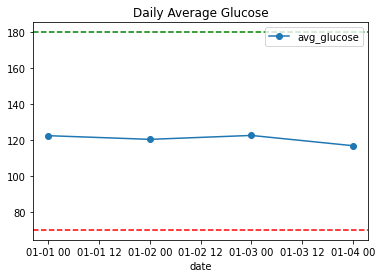

In [5]:
# Jupyter Cell 2: Plot Daily Avg
daily.plot(x="date", y="avg_glucose", marker="o", title="Daily Average Glucose")
plt.axhline(180, color="green", linestyle="--")
plt.axhline(70, color="red", linestyle="--")
plt.show()